In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

from numpy import zeros,zeros_like,array
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def myShrinkImageByFactorD(d,cmap="gray"):
    """
    d : List of 
    Shrink the image size by a factor of d along each dimension using image subsampling by
    sampling / selecting every d -th pixel along the rows and columns.
    This is the function that takes in the mutliples D to resize the image
    along with a colormap
    """
    input_file = "../data/circles_concentric.png"
    input_image = mpimg.imread(input_file,format="png")*255.0
    num_plots = len(d)+1
    
    width = input_image.shape[0]
    height = input_image.shape[1]
    
    fig,axes = plt.subplots(1,num_plots, constrained_layout=True, gridspec_kw={'width_ratios':[4,2,1]})
    
    #vmin = 0
    #vmax = 255

    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    count = 0

    for i in d:
        count = count + 1
        new_width = int(width/i)
        new_height = int(height/i)
        output = zeros((new_width,new_height))
        for W in range(new_width):
            for H in range(new_height):
                #if W%i==0 and H%i==0:
                    #new_width = int(W*i)
                    #new_height = int(H*i)
                output[W][H] = input_image[W*i][H*i]

        im = axes[count].imshow(output,cmap)
        axes[count].axis("on")

    #plt.subplots_adjust(right=0.8)
    #cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink=0.45)
    #cbar.ax.set_yticklabels([0,255])
    plt.show()

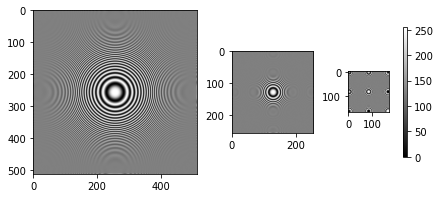

In [3]:
myShrinkImageByFactorD([2,3])

In [4]:
from math import ceil,floor

def myBilinearInterpolation(input_image,row_ratio=3,col_ratio=2,cmap="gray"):
#     input_file = "../data/barbaraSmall.png"
#     input_image = mpimg.imread(input_file,format="png")
    rows = input_image.shape[0]
    columns = input_image.shape[1]
    new_cols = col_ratio*columns-1
    new_rows = row_ratio*rows-2
    #row_ratio = ceil(new_rows/rows)
    #col_ratio = ceil(new_cols/columns)
    output = zeros((new_rows,new_cols))
    for row in range(new_rows):
        r = row/row_ratio
        r1 = floor(r)
        r2 = ceil(r)
        for col in range(new_cols):
            c = col/col_ratio
            c1 = floor(c)
            c2 = ceil(c)
            
            if(r1<=rows and r2<=rows and c1<=columns and c2<=columns):
                bottom_left = input_image[r1][c1]
                bottom_right = input_image[r1][c2]
                top_left = input_image[r2][c1]
                top_right = input_image[r2][c2]
                output[row][col] = bottom_right*(r%1)*(1-(c%1)) + bottom_left*(1-r%1)*(1-c%1)+top_right*(r%1)*(c%1) + top_left*(1-r%1)*(c%1)
    
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,2]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(output,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist())
    #cbar.ax.set_yticklabels([0,255])
    plt.show()
            
            

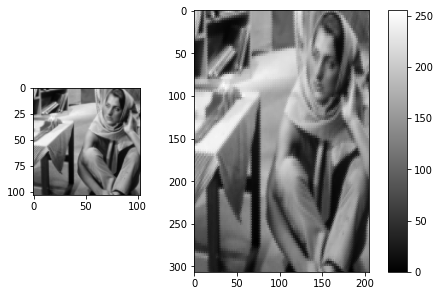

In [5]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")*255.0
myBilinearInterpolation(input_image)

In [6]:
def myNearestNeighbourInterpolation(input_image,row_ratio=3,col_ratio=2,cmap="gray"):
#     input_file = "../data/barbaraSmall.png"
#     input_image = mpimg.imread(input_file,format="png")
    rows = input_image.shape[0]
    columns = input_image.shape[1]
    new_cols = col_ratio*columns-1
    new_rows = row_ratio*rows-2
    #row_ratio = ceil(new_rows/rows)
    #col_ratio = ceil(new_cols/columns)
    output = zeros((new_rows,new_cols))
    for row in range(new_rows):
        r = row/row_ratio
        r1 = (floor(r) if (r%1)<0.5 else ceil(r))
        for col in range(new_cols):
            c = col/col_ratio
            c1 = (floor(c) if (c%1)<0.5 else ceil(c))
            output[row][col] = input_image[r1][c1]
            
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,2]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(output,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist())
    #cbar.ax.set_yticklabels([0,255])
    plt.show()

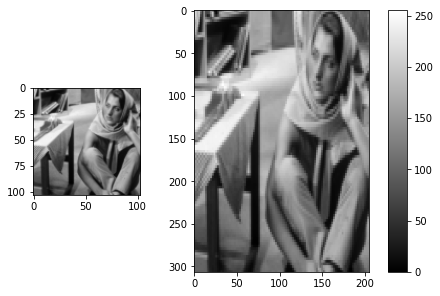

In [7]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")*255.0
myNearestNeighbourInterpolation(input_image)

In [8]:
from numpy import c_

def coeffUpdate(input_image,x,y):
    p = input_image.copy()
    r,c = input_image.shape[:2]
    q = zeros((r,4))
    s = zeros((4,c+4))
    p = np.concatenate((p,q), axis=1)
    p = np.concatenate((p,s), axis=0)
    
    for i in range(4):
        p[r+i][:] = input_image[r-1][c-1]
        p[:][c+i] = input_image[r-1][c-1]
    
    a00 = p[x+1][y+1]
    a01 = -.5*p[x+1][y+0] + .5*p[x+1][y+2]
    a02 = p[x+1][y+0] - 2.5*p[x+1][y+1] + 2*p[x+1][y+2] - .5*p[x+1][y+3]
    a03 = -.5*p[x+1][y+0] + 1.5*p[x+1][y+1] - 1.5*p[x+1][y+2] + .5*p[x+1][y+3]
    a10 = -.5*p[x+0][y+1] + .5*p[x+2][y+1]
    a11 = .25*p[x+0][y+0] - .25*p[x+0][y+2] - .25*p[x+2][y+0] + .25*p[x+2][y+2]
    a12 = -.5*p[x+0][y+0] + 1.25*p[x+0][y+1] - p[x+0][y+2] + .25*p[x+0][y+3] + .5*p[x+2][y+0] - 1.25*p[x+2][y+1] + p[x+2][y+2] - .25*p[x+2][y+3]
    a13 = .25*p[x+0][y+0] - .75*p[x+0][y+1] + .75*p[x+0][y+2] - .25*p[x+0][y+3] - .25*p[x+2][y+0] + .75*p[x+2][y+1] - .75*p[x+2][y+2] + .25*p[x+2][y+3]
    a20 = p[x+0][y+1] - 2.5*p[x+1][y+1] + 2*p[x+2][y+1] - .5*p[x+3][y+1]
    a21 = -.5*p[x+0][y+0] + .5*p[x+0][y+2] + 1.25*p[x+1][y+0] - 1.25*p[x+1][y+2] - p[x+2][y+0] + p[x+2][y+2] + .25*p[x+3][y+0] - .25*p[x+3][y+2]
    a22 = p[x+0][y+0] - 2.5*p[x+0][y+1] + 2*p[x+0][y+2] - .5*p[x+0][y+3] - 2.5*p[x+1][y+0] + 6.25*p[x+1][y+1] - 5*p[x+1][y+2] + 1.25*p[x+1][y+3] + 2*p[x+2][y+0] - 5*p[x+2][y+1] + 4*p[x+2][y+2] - p[x+2][y+3] - .5*p[x+3][y+0] + 1.25*p[x+3][y+1] - p[x+3][y+2] + .25*p[x+3][y+3]
    a23 = -.5*p[x+0][y+0] + 1.5*p[x+0][y+1] - 1.5*p[x+0][y+2] + .5*p[x+0][y+3] + 1.25*p[x+1][y+0] - 3.75*p[x+1][y+1] + 3.75*p[x+1][y+2] - 1.25*p[x+1][y+3] - p[x+2][y+0] + 3*p[x+2][y+1] - 3*p[x+2][y+2] + p[x+2][y+3] + .25*p[x+3][y+0] - .75*p[x+3][y+1] + .75*p[x+3][y+2] - .25*p[x+3][y+3]
    a30 = -.5*p[x+0][y+1] + 1.5*p[x+1][y+1] - 1.5*p[x+2][y+1] + .5*p[x+3][y+1]
    a31 = .25*p[x+0][y+0] - .25*p[x+0][y+2] - .75*p[x+1][0] + .75*p[x+1][2] + .75*p[x+2][0] - .75*p[x+2][2] - .25*p[x+3][0] + .25*p[x+3][2]
    a32 = -.5*p[x+0][y+0] + 1.25*p[x+0][y+1] - p[x+0][y+2] + .25*p[x+0][y+3] + 1.5*p[x+1][y+0] - 3.75*p[x+1][y+1] + 3*p[x+1][y+2] - .75*p[x+1][y+3] - 1.5*p[x+2][y+0] + 3.75*p[x+2][y+1] - 3*p[x+2][y+2] + .75*p[x+2][y+3] + .5*p[x+3][y+0] - 1.25*p[x+3][y+1] + p[x+3][y+2] - .25*p[x+3][y+3]
    a33 = .25*p[x+0][y+0] - .75*p[x+0][y+1] + .75*p[x+0][y+2] - .25*p[x+0][y+3] - .75*p[x+1][y+0] + 2.25*p[x+1][y+1] - 2.25*p[x+1][y+2] + .75*p[x+1][y+3] + .75*p[x+2][y+0] - 2.25*p[x+2][y+1] + 2.25*p[x+2][y+2] - .75*p[x+2][y+3] - .25*p[x+3][y+0] + .75*p[x+3][y+1] - .75*p[x+3][y+2] + .25*p[x+3][y+3]
    return ([a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33])

def myBicubicInterpolation(input_image,row_ratio=3,col_ratio=2,cmap="gray"):
    rows,columns = input_image.shape[:2]
    new_cols = col_ratio*columns-1
    new_rows = row_ratio*rows-2
    output = zeros((new_rows,new_cols))
    #coeffs = coeffUpdate(input_image)
    for row in range(new_rows):
        r = (row/row_ratio)
        x = r%1
        r1 = floor(r)
        for col in range(new_cols):
            c = col/col_ratio
            y = c%1
            c1 = floor(c)
            if (r1>=0 and c1>=0):
                a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33 = coeffUpdate(input_image,r1,c1)
#             elif(r1>=0 and r1+2<rows and c1>=0 and c1+2<columns):
#                 a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33 = coeffUpdate(input_image,r1-1,c1-1)
#             elif(r1>=0 and r1+1<rows and c1>=0 and c1+1<columns):
#                 a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33 = coeffUpdate(input_image,r1-2,c1-2)
#             elif(r1>=0 and c1>=0):
#                 a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33 = coeffUpdate(input_image,r1-3,c1-3)
                output[row][col] = (a00 + a01 * y + a02 * y**2 + a03 * y**3) + (a10 + a11 * y + a12 * y**2 + a13 * y**3) * x + (a20 + a21 * y + a22 * y**2 + a23 * y**3) * x**2 + (a30 + a31 * y + a32 * y**2 + a33 * y**3) * x**3
    
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,2]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(output,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist())
    #cbar.ax.set_yticklabels([0,255])
    plt.show()        
    

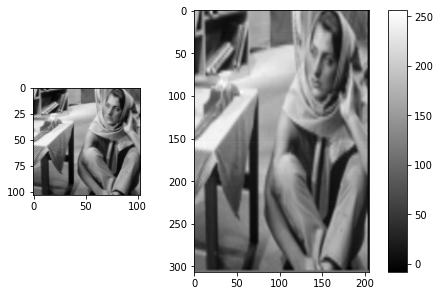

In [9]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")*255
myBicubicInterpolation(input_image)

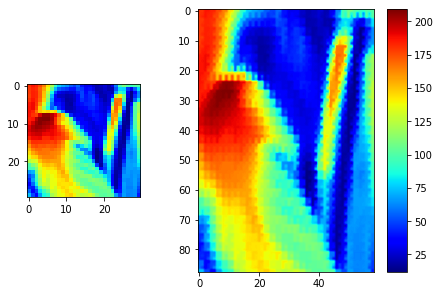

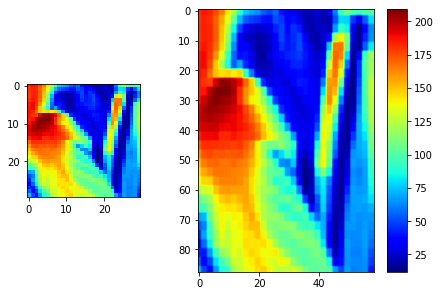

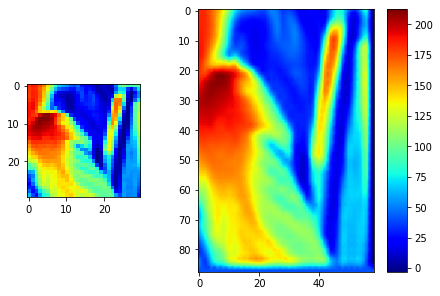

In [10]:
region = input_image[50:80,50:80]
myBilinearInterpolation(region,cmap="jet")
myNearestNeighbourInterpolation(region,cmap="jet")
myBicubicInterpolation(region,cmap="jet")

In [11]:
from math import cos,sin,pi,radians

def myImageRotation(input_image,theta,cmap="gray"):
    theta = radians(theta)
    translation_matrix = array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    rows,columns = input_image.shape[:2]
    x_mid,y_mid = (rows-1)/2,(columns-1)/2
    new_image = zeros_like(input_image)
    for row in range(rows):
        for col in range(columns):
            r,c = np.matmul(translation_matrix,array([row-x_mid,col-y_mid]))
            r1 = floor(r+x_mid)
            r2 = ceil(r+x_mid)
            c1 = floor(c+y_mid)
            c2 = ceil(c+x_mid)
            #if (r>=0 and r<rows) and (c>=0 and c<columns):
                #new_image[row][col] = input_image[r][c]
            if(r1>=0 and r1<rows and r2>=0 and r2<rows and c1>=0 and c1<columns and c2>=0 and c2<columns):
                bottom_left = input_image[r1][c1]
                bottom_right = input_image[r1][c2]
                top_left = input_image[r2][c1]
                top_right = input_image[r2][c2]
                new_image[row][col] = bottom_right*(r%1)*(1-(c%1)) + bottom_left*(1-r%1)*(1-c%1)+top_right*(r%1)*(c%1) + top_left*(1-r%1)*(c%1)

    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,1]})
    axes[0].imshow(input_image,cmap)
    axes[0].axis("on")
    
    im = axes[1].imshow(new_image,cmap)
    axes[1].axis("on")
    
    cbar = fig.colorbar(im,ax=axes.ravel().tolist())
    #cbar.ax.set_yticklabels([0,255])
    plt.show()

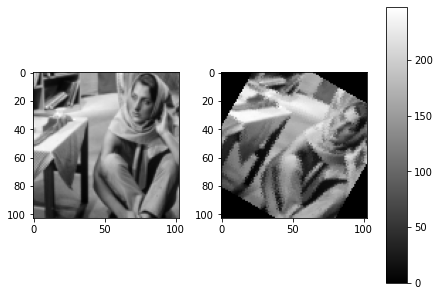

In [12]:
input_file = "../data/barbaraSmall.png"
input_image = mpimg.imread(input_file,format="png")*255.0
myImageRotation(input_image,30)